In [1]:
%reset -f
import numpy as np
from sklearn.metrics import mean_absolute_error
from scipy.integrate import quad

# ثابت‌ها
a = 0  # مقدار a
b = 1  # مقدار b
lambda_ = 0  # مقدار λ
mu = 1.0  # مقدار μ
eps = 1.0  # مقدار k

# تعریف توابع k1 و k2
def k1(x, t):
    return 0  # نمونه تابع، می‌توانید تغییر دهید

def k2(x, t):
    return (x - t)  # نمونه تابع، می‌توانید تغییر دهید

# تابع برای محاسبه ha_ij
def ha_ij(xi, j):
    term1 = eps * np.cos(j * np.pi * (xi - a) / (b - a))
    
    # انتگرال اول
    def integrand1(t):
        return k1(xi, t) * np.cos(j * np.pi * (t - a) / (b - a))
    
    term2, _ = quad(integrand1, a, b)
    term2 *= lambda_
    
    # انتگرال دوم
    def integrand2(t):
        return k2(xi, t) * np.cos(j * np.pi * (t - a) / (b - a))
    
    term3, _ = quad(integrand2, a, xi)
    term3 *= mu
    
    return term1 + term2 + term3

# پارامترهای N و M
N = 50  # تعداد xi‌ها
M = 11  # تعداد j‌ها

# محاسبه ماتریس Ha
Ha = np.zeros((N + 1, M + 1))
#r = [a + i * (b - a) / N for i in range(N + 1)]
for i in range(N + 1):
#    xi = (r[i] + a + (i + 1) * (b - a) / N) / 2
    xi = a + i * (b - a) / N
    for j in range(M + 1):
        Ha[i, j] = ha_ij(xi, j)

# نمایش ماتریس Ha
print("Matrix Ha:")
print(Ha)

# تابع برای محاسبه hb_ij
def hb_ij(xi, j):
    term4 = eps * np.sin(j * np.pi * (xi - a) / (b - a))
    
    # انتگرال اول
    def integrand3(t):
        return k1(xi, t) * np.sin(j * np.pi * (t - a) / (b - a))
    
    term5, _ = quad(integrand3, a, b)
    term5 *= lambda_
    
    # انتگرال دوم
    def integrand4(t):
        return k2(xi, t) * np.sin(j * np.pi * (t - a) / (b - a))
    
    term6, _ = quad(integrand4, a, xi)
    term6 *= mu
    
    return term4 + term5 + term6

# محاسبه ماتریس Hb
Hb = np.zeros((N + 1, M + 1))

for i in range(N + 1):
#    xi = (r[i] + a + (i + 1) * (b - a) / N) / 2
    xi = a + i * (b - a) / N
    for j in range(M + 1):
        Hb[i, j] = hb_ij(xi, j)

# نمایش ماتریس Hb
print("Matrix Hb:")
print(Hb)

# الحاق ماتریس‌ها به صورت افقی
H_train = np.hstack((Ha, Hb))

print("Matrix H_train:")
print(H_train)

# تعریف تابع g
def g(x):
    return 1  # نمونه تابع، می‌توانید تغییر دهید

# محاسبه مقادیر g برای هر xi
#Y_train = [g((r[i] + a + (i + 1) * (b - a) / N) / 2) for i in range(N)]
Y_train = [g(xi) for i in range(N + 1)]

# نمایش بردار Y_train
print("Vector Y_train:")
print(Y_train)

# محاسبه وزن‌های خروجی با استفاده از شبه‌معکوس
H_train_pseudo_inv = np.linalg.pinv(H_train)
beta_hat = np.dot(H_train_pseudo_inv, Y_train)

print("Vector beta_hat:")
print(beta_hat)



# پارامترهای تست N و M
Nt = 10  # تعداد xt‌ها
xt = np.array([0.0624, 0.0915, 0.1518, 0.2410, 0.3604, 0.5252, 0.6395, 0.7590, 0.8482, 0.9084, 0.9348])

# محاسبه ماتریس Ha_test
Ha_test = np.zeros((Nt + 1, M + 1))
for i in range(Nt + 1):
    xti = xt[i]
    for j in range(M + 1):
        Ha_test[i, j] = np.cos(j * np.pi * (xti - a) / (b - a))

# نمایش ماتریس Ha_test
print("Matrix Ha_test:")
print(Ha_test)

# محاسبه ماتریس Hb_test
Hb_test = np.zeros((Nt + 1, M + 1))
for i in range(Nt + 1):
    xti = xt[i]
    for j in range(M + 1):
        Hb_test[i, j] = np.sin(j * np.pi * (xti - a) / (b - a))

# نمایش ماتریس Hb_test
print("Matrix Hb_test:")
print(Hb_test)

# الحاق ماتریس‌ها به صورت افقی
H_test = np.hstack((Ha_test, Hb_test))

# نمایش ماتریس H_test
print("Matrix H_test:")
print(H_test)

# پیش‌بینی خروجی‌ها
Y_pred = np.dot(H_test, beta_hat)

print("Vector x_test points:")
print(xt)
print("Predicted Y values:")
print(Y_pred)



Matrix Ha:
[[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00]
 [ 1.00020000e+00  9.98226663e-01  9.92314438e-01  9.82486659e-01
   9.68782111e-01  9.51254877e-01  9.29974128e-01  9.05023849e-01
   8.76502504e-01  8.44522652e-01  8.09210501e-01  7.70705407e-01]
 [ 1.00080000e+00  9.92913649e-01  9.69378959e-01  9.30567056e-01
   8.77089977e-01  8.09791019e-01  7.29731439e-01  6.38173717e-01
   5.36561648e-01  4.26497572e-01  3.09717107e-01  1.88061773e-01]
 [ 1.00180000e+00  9.84081927e-01  9.31555268e-01  8.46080468e-01
   7.30684954e-01  5.89455896e-01  4.27395423e-01  2.50243431e-01
   6.42742566e-02 -1.23925578e-01 -3.07690683e-01 -4.80512905e-01]
 [ 1.00320000e+00  9.71766352e-01  8.79439868e-01  7.32019874e-01
   5.38766206e-01  3.11817443e-01  6.54282744e-02 -1.84926072e-01
  -4.23522078e-01 -6.35375771e-01 -8.07184077e-01 -9.28160558

Vector beta_hat:
[ 7.43140186e-01  2.70453942e-01  3.00539425e-02 -4.98073010e-02
 -3.40274558e-03  1.05162283e-02  3.85264517e-04 -1.39619394e-03
 -2.61229870e-05  8.31171128e-05  6.28698217e-07 -9.45449472e-07
  2.50836688e-10  1.57427263e-01 -1.03607023e-01 -9.57809947e-03
  2.37820783e-02  1.19114330e-03 -4.13610224e-03 -1.09672343e-04
  3.87634052e-04  4.86236058e-06 -1.22863139e-05 -4.24874997e-08]
Matrix Ha_test:
[[ 1.          0.98084652  0.9241198   0.83199286  0.7079948   0.55687562
   0.38442422  0.19724671  0.00251327 -0.19231644 -0.3797791  -0.55269357]
 [ 1.          0.95896831  0.83924045  0.65064169  0.40864907  0.13312134
  -0.15333078 -0.42720006 -0.66601187 -0.85016849 -0.96455742 -0.99979151]
 [ 1.          0.88842504  0.57859809  0.13965702 -0.3304485  -0.72681447
  -0.96099183 -0.98072394 -0.78160757 -0.40807553  0.05651853  0.5085005 ]
 [ 1.          0.72681447  0.05651853 -0.64465749 -0.99361131 -0.79968466
  -0.16883344  0.55426348  0.97452687  0.86233698  0.27

In [2]:
def es(x):
    return np.cos(x)  

Y_true = [es(xt[i]) for i in range(Nt + 1)]

print("Exact Solution:")
print(Y_true)

A_E = abs(Y_true - Y_pred)
print("Absolute Error:")
print(A_E)
#mae = mean_absolute_error(Y_true, Y_pred)
#print("Mean Absolute Error:", mae)

Exact Solution:
[0.9980537516416355, 0.9958167947921394, 0.9885004876341299, 0.9710997865962726, 0.9357558391166375, 0.865223681716196, 0.8023942553305646, 0.7255245696532203, 0.6613343807115827, 0.615008169338956, 0.593979334312245]
Absolute Error:
[1.15717014e-09 1.24094812e-09 2.01868977e-09 2.02330852e-09
 1.98459660e-09 2.39890230e-09 1.79451431e-09 1.73014236e-09
 1.79879589e-09 1.48359691e-09 7.54170504e-10]


In [3]:
lbh = len(beta_hat)
ac = beta_hat[:lbh // 2]
bc = beta_hat[lbh // 2:]
print("ac:")
print(ac)
print("bc:")
print(bc)

ac:
[ 7.43140186e-01  2.70453942e-01  3.00539425e-02 -4.98073010e-02
 -3.40274558e-03  1.05162283e-02  3.85264517e-04 -1.39619394e-03
 -2.61229870e-05  8.31171128e-05  6.28698217e-07 -9.45449472e-07]
bc:
[ 2.50836688e-10  1.57427263e-01 -1.03607023e-01 -9.57809947e-03
  2.37820783e-02  1.19114330e-03 -4.13610224e-03 -1.09672343e-04
  3.87634052e-04  4.86236058e-06 -1.22863139e-05 -4.24874997e-08]


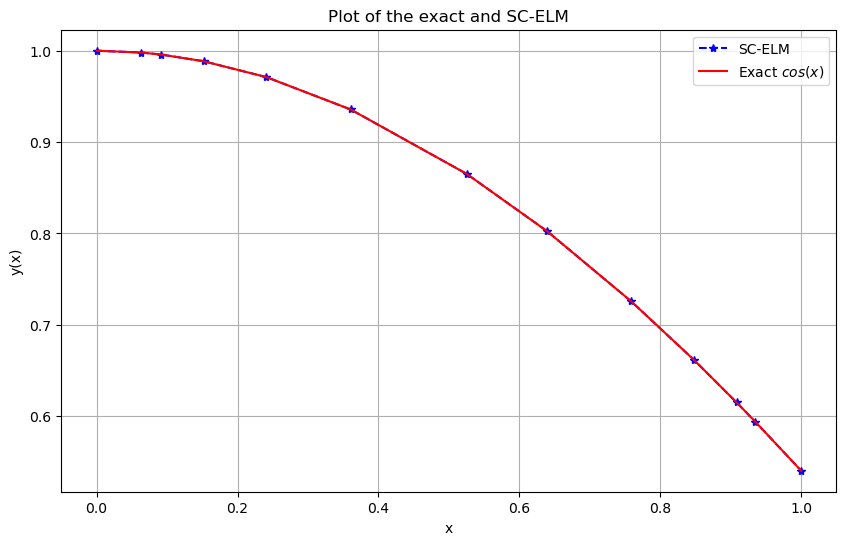

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# تعریف پارامترها
M = 11
a = 0
b = 1
  # ضرایب a_j به صورت [a_0, a_1, a_2]

# تابع محاسبه مجموع کسینوسی
def cosine_sin_sum(x, M, a, b, ac, bc):
    result = 0
    for j in range(M + 1):
        result += ac[j] * np.cos((j * np.pi / (b - a)) * (x - a)) + bc[j] * np.sin((j * np.pi / (b - a)) * (x - a))
    return result

# محاسبه مقادیر تابع برای بازه x از 0 تا 1
#x_values = np.linspace(0, 1, 100)
x_values = np.array([0, 0.0624, 0.0915, 0.1518, 0.2410, 0.3604, 0.5252, 0.6395, 0.7590, 0.8482, 0.9084, 0.9348, 1])
SC_ELM_values = [cosine_sin_sum(x, M, a, b, ac, bc) for x in x_values]


exact_values = np.cos(x_values)


# رسم نمودار

plt.figure(figsize=(10, 6))
plt.plot(x_values, SC_ELM_values, label='SC-ELM', color='blue', marker='*', linestyle='--')
plt.plot(x_values, exact_values, label='Exact $cos(x)$', color='red')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Plot of the exact and SC-ELM')
plt.legend()
plt.grid(True)
plt.show()



error_values:
[ 1.37958978e-10 -1.15717014e-09 -1.24094790e-09 -2.01868977e-09
 -2.02330874e-09 -1.98459693e-09 -2.39890230e-09 -1.79451431e-09
 -1.73014236e-09 -1.79879578e-09 -1.48359680e-09 -7.54170615e-10
  7.86868348e-11]


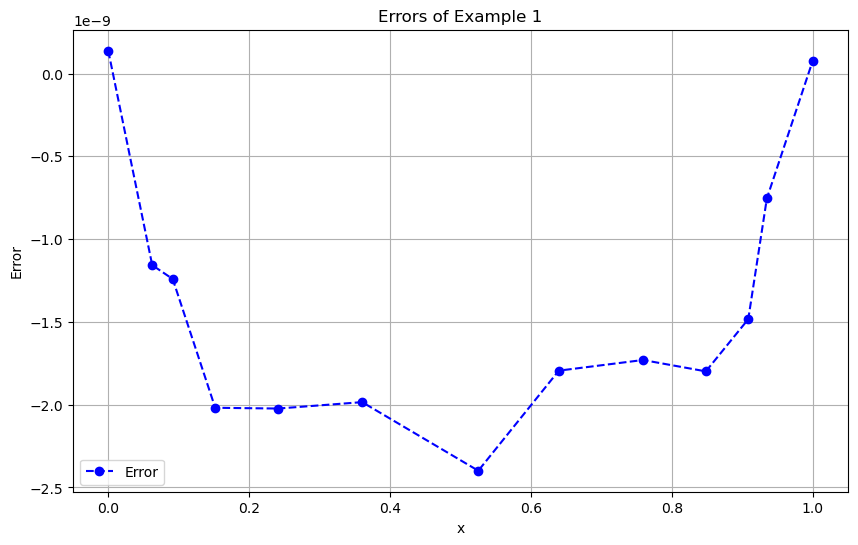

In [10]:
error_values = exact_values - SC_ELM_values

print('error_values:')
print(error_values)

plt.figure(figsize=(10, 6))
plt.plot(x_values, error_values,  color='blue', label='Error', marker='o', linestyle='--')
plt.xlabel('x')
plt.ylabel('Error')
plt.title('Errors of Example 1')
plt.legend()
plt.grid(True)
plt.show()